In [764]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [765]:
df = pd.read_csv("../data/DataScientist.csv")

print(df.shape)
df.head(3)
df = df.drop(['Unnamed: 0', "index"], axis = 1)
df.head()

(3909, 17)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [766]:
# Clean Company Names

def cleanCompName(name): 
    if name.find("\n") != -1:
        newname = name[0:name.find("\n")]
    else:
        newname = name
    return newname

df["Company Name"] = df["Company Name"].map(cleanCompName)

In [767]:
def ersetze_kurznamen(kurzname):
    us_bundesstaaten = {
        'AL': 'Alabama',
        'AK': 'Alaska',
        'AZ': 'Arizona',
        'AR': 'Arkansas',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'IA': 'Iowa',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'ME': 'Maine',
        'MD': 'Maryland',
        'MA': 'Massachusetts',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MS': 'Mississippi',
        'MO': 'Missouri',
        'MT': 'Montana',
        'NE': 'Nebraska',
        'NV': 'Nevada',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NY': 'New York',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VT': 'Vermont',
        'VA': 'Virginia',
        'WA': 'Washington',
        'WV': 'West Virginia',
        'WI': 'Wisconsin',
        'WY': 'Wyoming',
        '-1': 'Unknown'
    }
    
    if kurzname in us_bundesstaaten:
        return us_bundesstaaten[kurzname] + ", USA"
    else:
        return kurzname

In [768]:
#df["State Location"] = df.Location.apply(lambda x : x[-2:])

df["State Headquarter"] = df.Headquarters.apply(lambda x : x.split()[-1]).apply(lambda x : x if x != "Kingdom" else "United Kingdom").apply(lambda x : ersetze_kurznamen(x))
df["State Location"] = df.Location.apply(lambda x : x.split()[-1]).apply(lambda x : x if x != "Kingdom" else "United Kingdom").apply(lambda x : ersetze_kurznamen(x))
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State Headquarter,State Location
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,Canada,"New York, USA"
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,"New York, USA","New York, USA"
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,"New York, USA","New York, USA"
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,"New Jersey, USA","New Jersey, USA"
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,"New York, USA","New York, USA"


In [769]:
# convert min and max salary to numbers

def averageSalary(salary):
    min_salary = int(re.findall(r'\d+', salary)[0])
    max_salary = int(re.findall(r'\d+', salary)[1])
    average_salary = (min_salary + max_salary) / 2 * 1000
    #min_salary = min_salary[1:]
    #min_salary = int(min_salary)
    return average_salary

df["average_salary"] = df["Salary Estimate"].apply(averageSalary)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State Headquarter,State Location,average_salary
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,Canada,"New York, USA",146000.0
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,"New York, USA","New York, USA",146000.0
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,"New York, USA","New York, USA",146000.0
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,"New Jersey, USA","New Jersey, USA",146000.0
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,"New York, USA","New York, USA",146000.0


In [770]:
df.keys()

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'State Headquarter', 'State Location', 'average_salary'],
      dtype='object')

In [771]:
# Create Compare Title
df["Compare Title"] = ""

for job in df["Job Title"]:
    
    pattern = r'[^a-zA-Z0-9\s]'  # Pattern, das auf alle Sonderzeichen passt
    job2 = re.sub(pattern, ' ', job)
    
    jobsplit = job2.split()
    if "Data" and "Scientist" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Scientist"

    elif "Data" and "Science" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Scientist"
        
    elif "Data" and "Sciences" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Scientist"
    
    elif "Data" and "Scientist," in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Scientist"
        
    elif "Data" and "Analyst" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Analyst"
        
    elif "Analytics" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Analyst"

    elif "Quantitative" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Quantitative Researcher"
        
    elif "Data" and "Engineer" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Engineer"
        

        
    elif "Consultant" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Consultant"
        
    elif "Consulting" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Consultant"
        
df = df[df["Compare Title"] != ""]
df

'''elif "Machine" and "Learning" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Machine Learning Engineer"'''

'elif "Machine" and "Learning" in jobsplit:\n        df.loc[df["Job Title"] == job, "Compare Title"] = "Machine Learning Engineer"'

In [794]:
# Define the start and end colors
start_color = '#004C66'  # Deep sea blue
end_color = '#00FF7F'  # Spring green

# Create a LinearSegmentedColormap
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('colorset', [start_color, end_color], N=20)

# Generate the hex values for the color set
colors_20 = [plt.cm.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]



# Define the start and end colors
start_color = '#004C66'  # Deep sea blue
end_color = '#00FF7F'  # Spring green

# Create a LinearSegmentedColormap
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('colorset', [start_color, end_color], N=6)

# Generate the hex values for the color set
colors_6 = [plt.cm.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

def plotlyplot(df,number,title, colors = colors_20, xtitle = "", ytitle = ""):
    
    fig = go.Figure()
    fig.add_trace(go.Bar(x = df[df.columns[0]][:number], y = df[df.columns[1]][:number], marker_color = colors))

    fig.update_layout(font_size = 16, height = 800, width = 1000, title = title, title_x = 0.5, xaxis_title=xtitle, yaxis_title=ytitle)

    fig.show()
    
def plotlyscatter(df,title, xtitle = "", ytitle = ""):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[df.columns[0]], y=df[df.columns[1]], mode='markers', marker_color = colors))

    fig.update_layout(font_size = 16, height = 800, width = 1000, title = title, title_x = 0.5, xaxis_title=xtitle, yaxis_title=ytitle)

    fig.show()
    
def plotlyscatterz(df,title, factor = 1):
    #sizeref = 10 #2 * max(df[df.columns[2]]) / (10 * factor ** 2)
    scaler = 1/factor
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[df.columns[0]], y=df[df.columns[1]], mode='markers',
                         marker = {  
                            "sizemode": "area", 
                            "size": df[df.columns[2]], 
                            "sizeref": scaler
                             },
                             hovertemplate=
                            "%{x}<br>" +
                            "%{y}<br>" +
                            "%{marker.size:,}" +
                            "<extra></extra>"
                            ))

    fig.update_layout(font_size = 16, height = 800, width = 1000, title = title, title_x = 0.5)

    fig.show()
    
    
                                #"sizeref": max(ds_e2['petal_length'])*0.01

In [773]:
# disabling all -1 values

df["Rating"] = df["Rating"].apply(lambda x : float(x)).apply(lambda x : x if x != -1 else 0)

df["Founded"] = df["Founded"].apply(lambda x : x if x != -1 else "Unknown")
df["Sector"] = df["Sector"].apply(lambda x : x if x != "-1" else "Unknown")
df["Industry"] = df["Industry"].apply(lambda x : x if x != "-1" else "Unknown")
df["Competitors"] = df["Competitors"].apply(lambda x : x if x != "-1" else "Unknown")
df["Easy Apply"] = df["Easy Apply"].apply(lambda x : x if x != "-1" else "Unknown")

## Which Job Titles and which Keywords are being used?

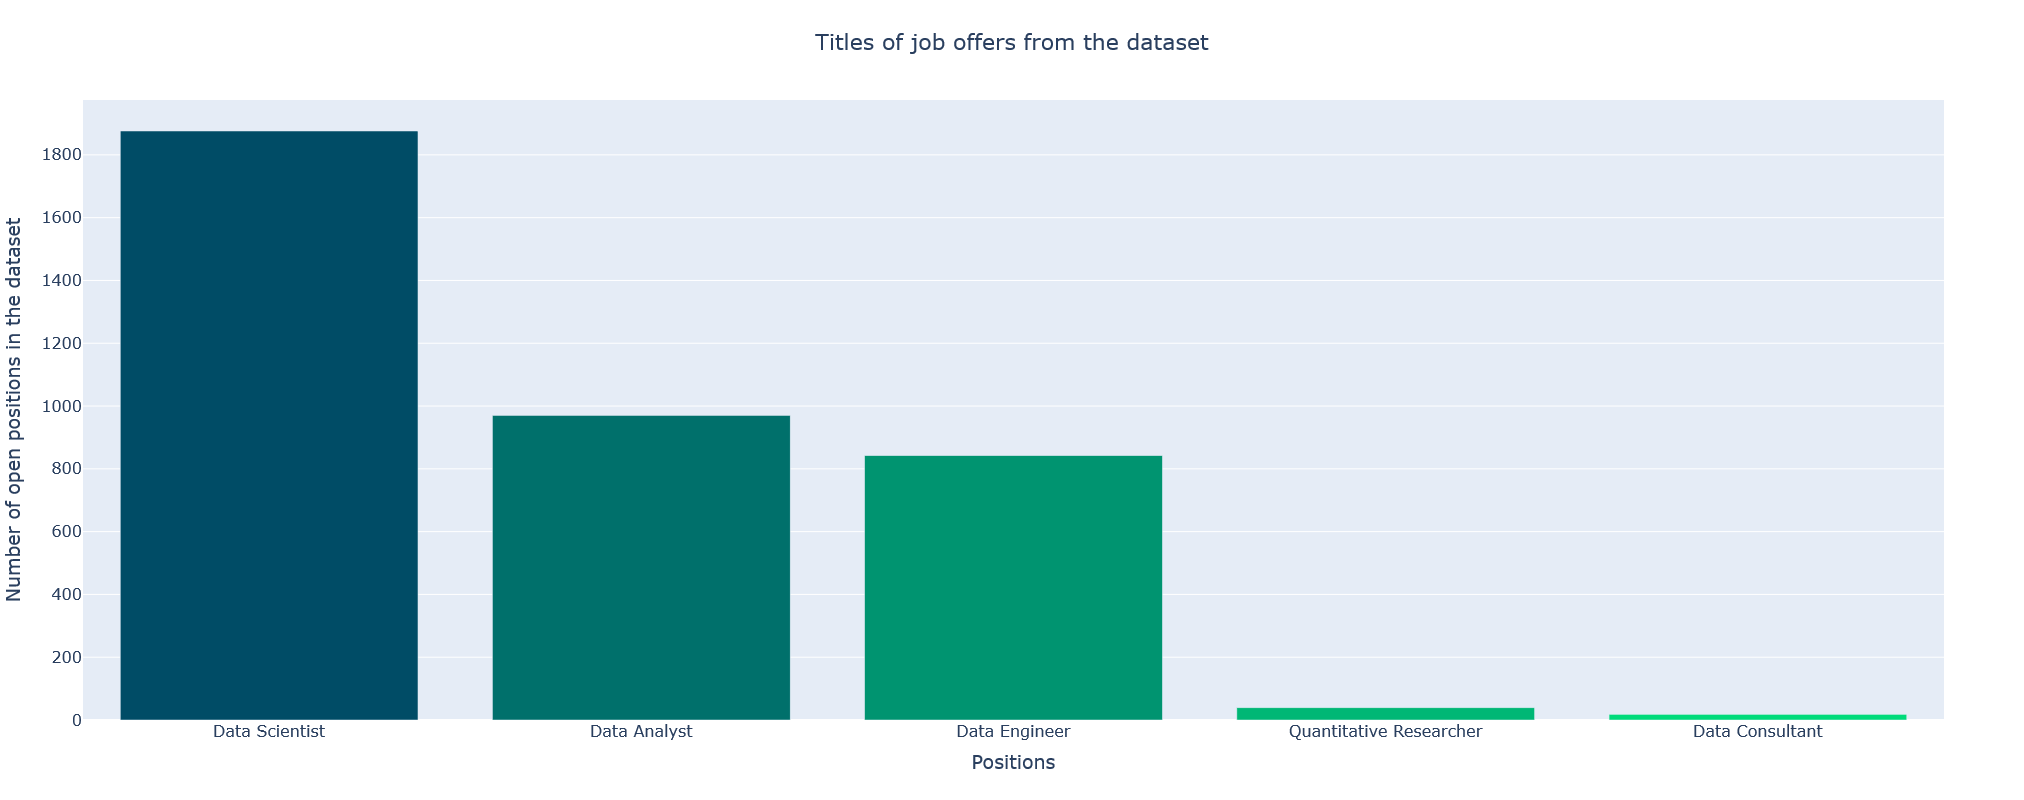

In [774]:
# Which titles are used for the jobs?
jobs_names_df = pd.DataFrame(df["Compare Title"].value_counts().reset_index())

jobs_names_df.columns = ["Job Title","Count"]
jobs_names_df["Job Title"].replace("", np.nan, inplace = True)
jobs_names_df.dropna(subset = ["Job Title"], inplace = True)
plotlyplot(jobs_names_df, 10, "Titles of job offers from the dataset", colors = colors_6, xtitle = "Positions", ytitle = "Number of open positions in the dataset")

### Which companies are offering the most positions?

In [775]:
pos_by_cpy = pd.DataFrame(df["Company Name"].value_counts()).reset_index()
pos_by_cpy.columns = ["Company","Count"]
#plotlyplot(pos_by_cpy,10, "Number of Job Offerings by Company")

top_cpy_df = df["Company Name"].value_counts().head(10).reset_index()
top_cpy_df.columns = ["Company","Count"]
top_cpy_list = [] 
for company in top_cpy_df["Company"]:
    top_cpy_list = top_cpy_list + [company]
top_cpy_list

['Apple',
 'IBM',
 'Amazon',
 'Staffigo Technical Services, LLC',
 'Facebook',
 'Solekai Systems Corp',
 'Diverse Lynx',
 'Varsity Tutors',
 'Humana',
 'GSK']

In [776]:
title_by_company = df_c.groupby(by = ["Company Name", "Compare Title"])["Location"].count().reset_index()
title_by_company = title_by_company[title_by_company["Company Name"].isin(top_cpy_list)]
title_by_company

,Company Name,Compare Title,Location
119,Amazon,Data Analyst,1
120,Amazon,Data Engineer,7
121,Amazon,Data Scientist,39
157,Apple,Data Analyst,2
158,Apple,Data Engineer,20
159,Apple,Data Scientist,37
640,Diverse Lynx,Data Analyst,5
641,Diverse Lynx,Data Engineer,14
642,Diverse Lynx,Data Scientist,3
745,Facebook,Data Analyst,1


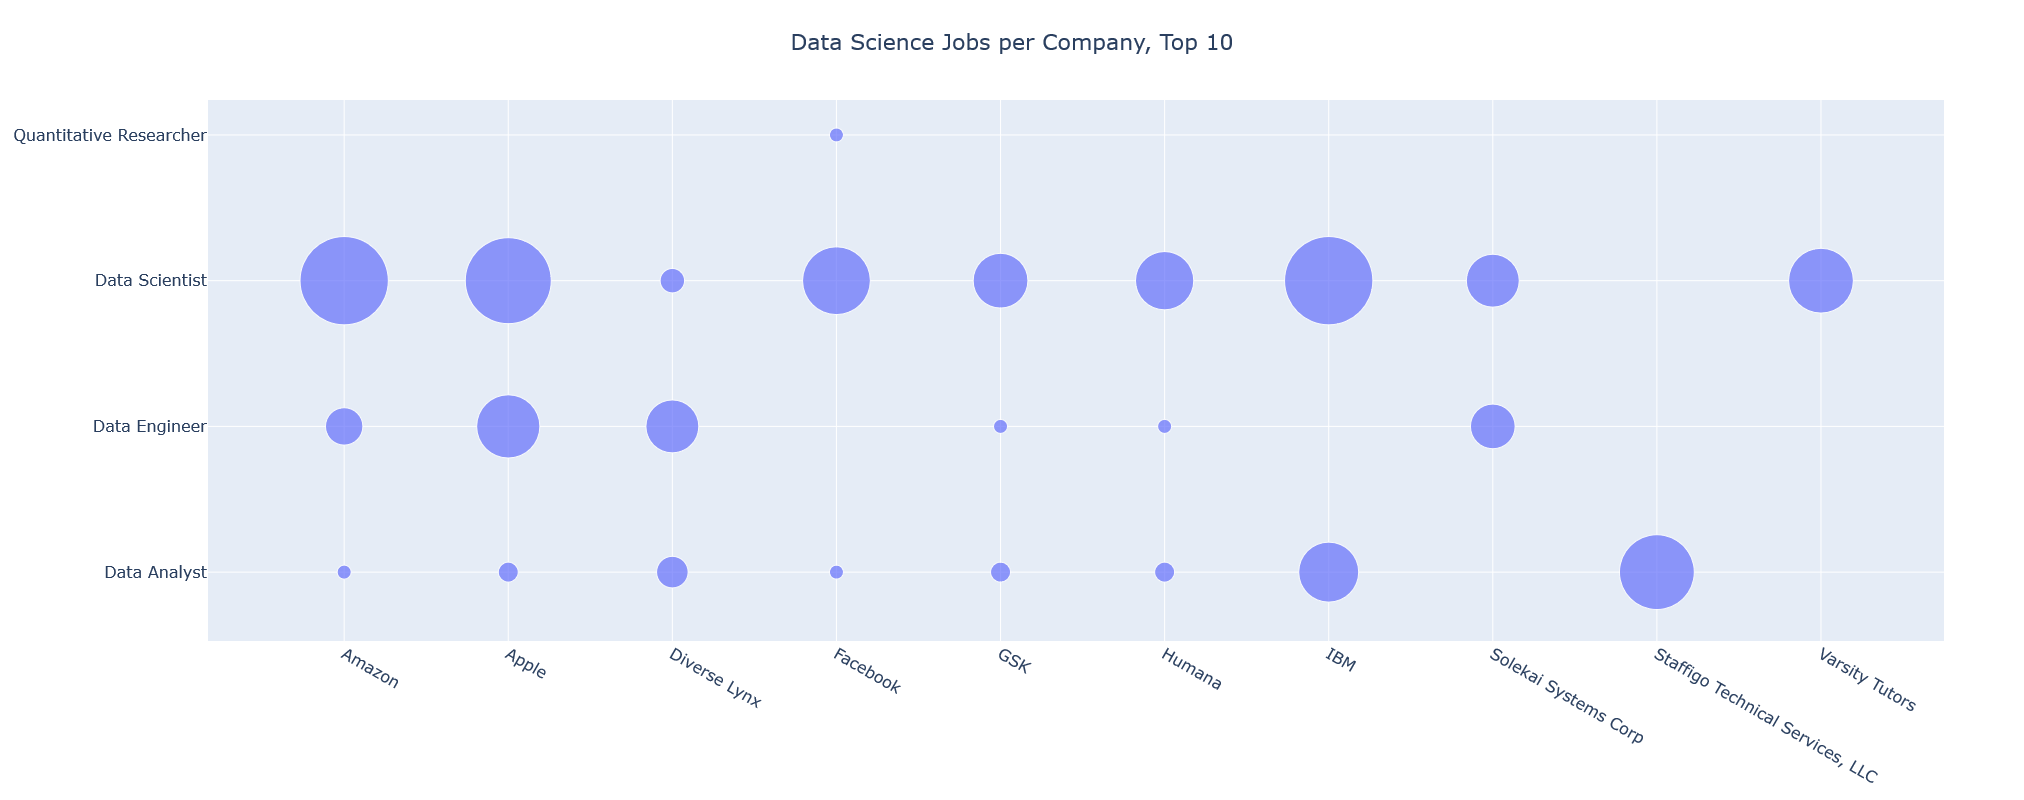

In [796]:
plotlyscatterz(title_by_company, "Data Science Jobs per Company, Top 10", 100)

In [778]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State Headquarter,State Location,average_salary,Compare Title
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,Unknown,Unknown,Canada,"New York, USA",146000.0,Data Scientist
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,Unknown,Unknown,"New York, USA","New York, USA",146000.0,Data Scientist
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,0.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,Unknown,Unknown,Unknown,Unknown,Unknown / Non-Applicable,Unknown,True,"New York, USA","New York, USA",146000.0,Data Scientist
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",Unknown,"New Jersey, USA","New Jersey, USA",146000.0,Data Analyst
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",Unknown,"New York, USA","New York, USA",146000.0,Data Scientist


### Which sector offers the most positions related to Data Science?

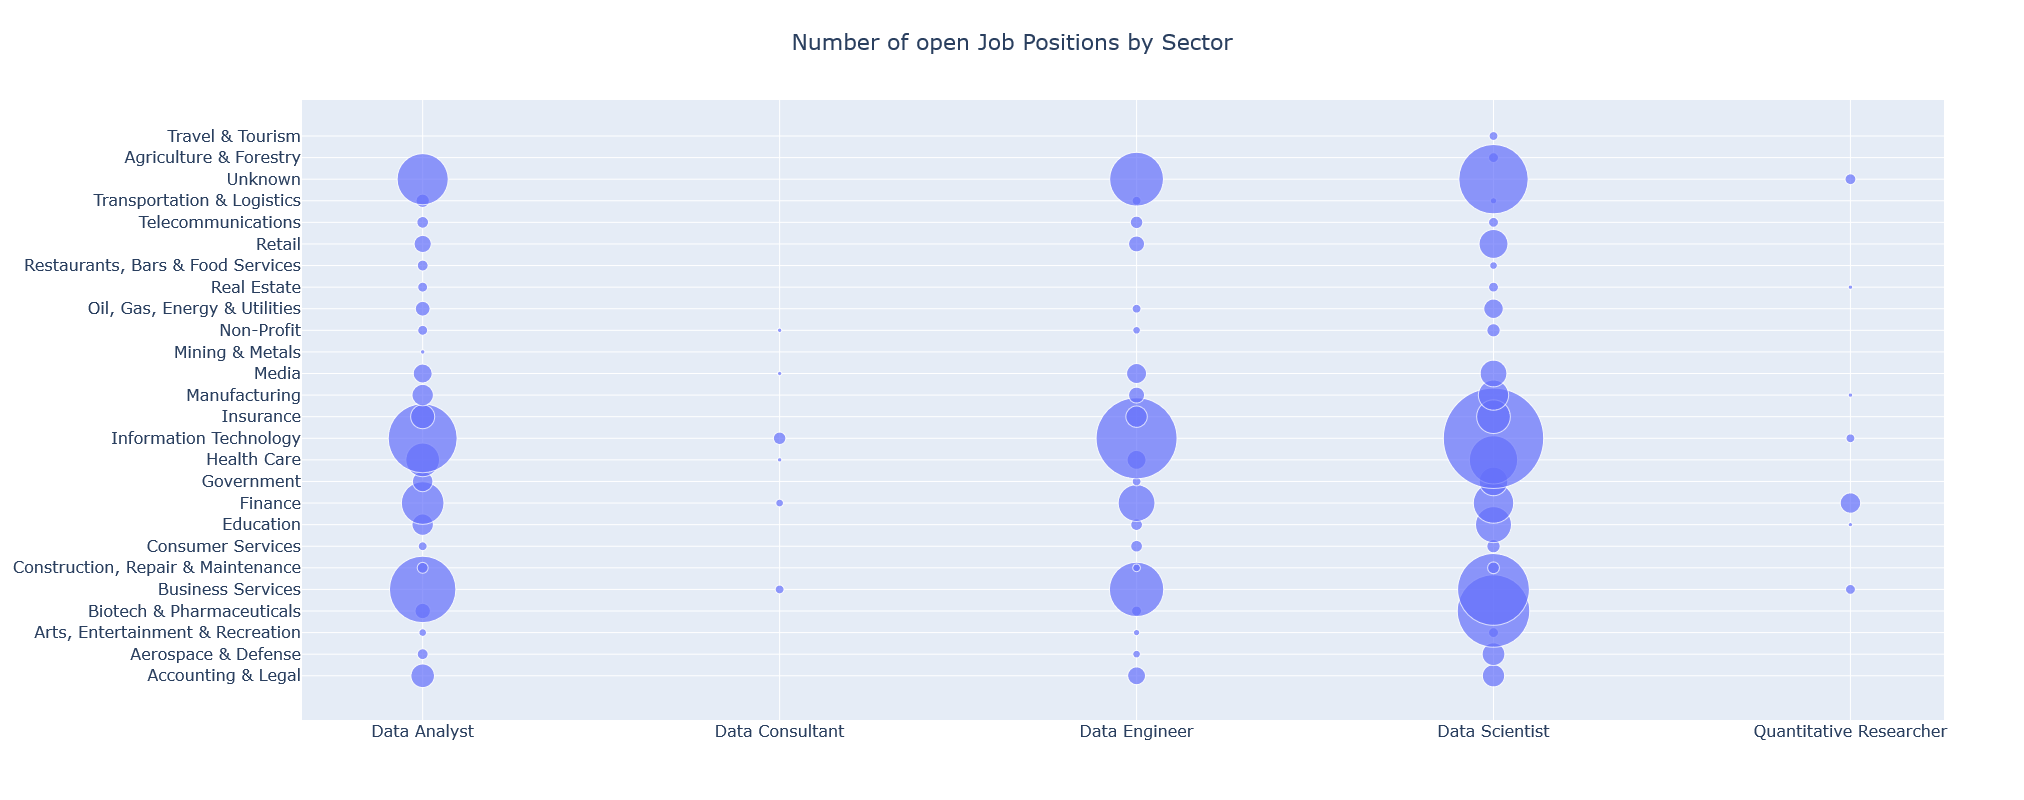

In [779]:
df_c = df[df["Compare Title"] != ""]
title_by_sector = df_c.groupby(by = ["Compare Title", "Sector"])["Location"].count().reset_index()

plotlyscatterz(title_by_sector, "Number of open Job Positions by Sector", 10)

### Where to find the happiest data nerds ind the US?

In [780]:
def to_df(series,column1, column2):
    df1 = pd.DataFrame(series).reset_index()
    df1.columns = [column1, column2]
    return df1

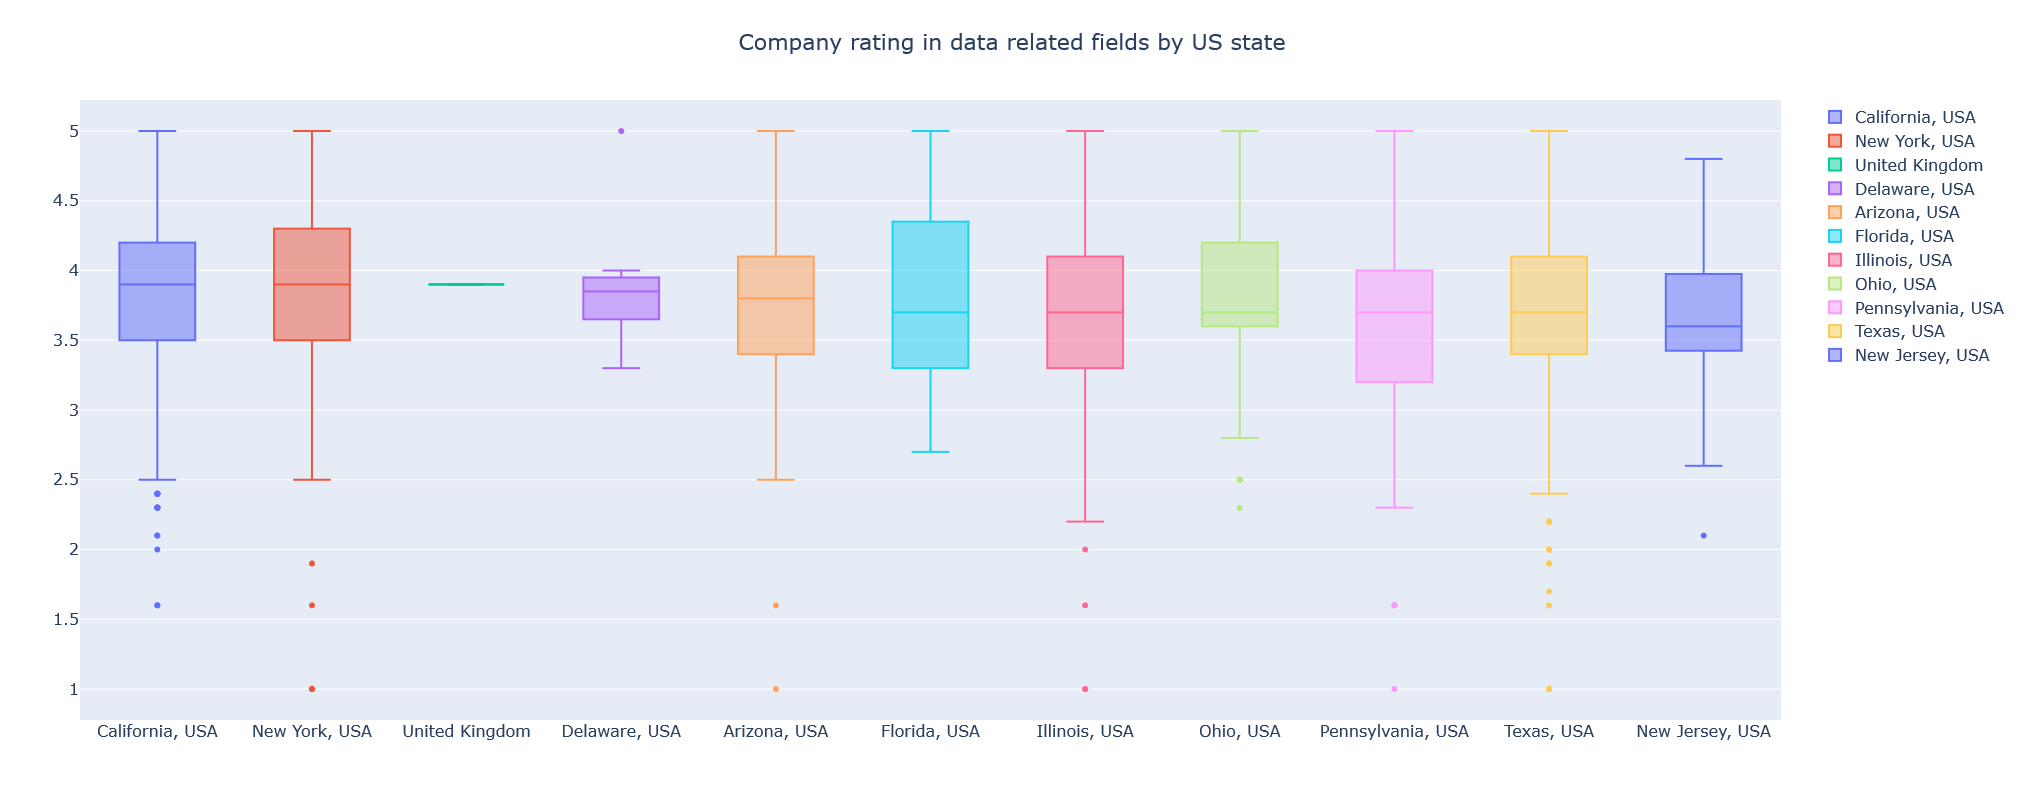

In [781]:
df_states_sorted_by_mean = df2.groupby("State Location")["Rating"].median().sort_values(ascending = False).reset_index()
states_sorted_by_median = df_states_sorted_by_mean["State Location"].unique()

ratings_list = {}
fig = go.Figure()


for state in states_sorted_by_median:
    dfx = df2[df2["State Location"]==state].Rating
    ratings_list[state] = dfx
    fig.add_trace(go.Box(y=dfx, name = state))

fig.update_layout(font_size = 16, height = 800, width = 1000, title = "Company rating in data related fields by US state", title_x = 0.5)
    
fig.show()

### Which companies pay most based on average salary estimate?

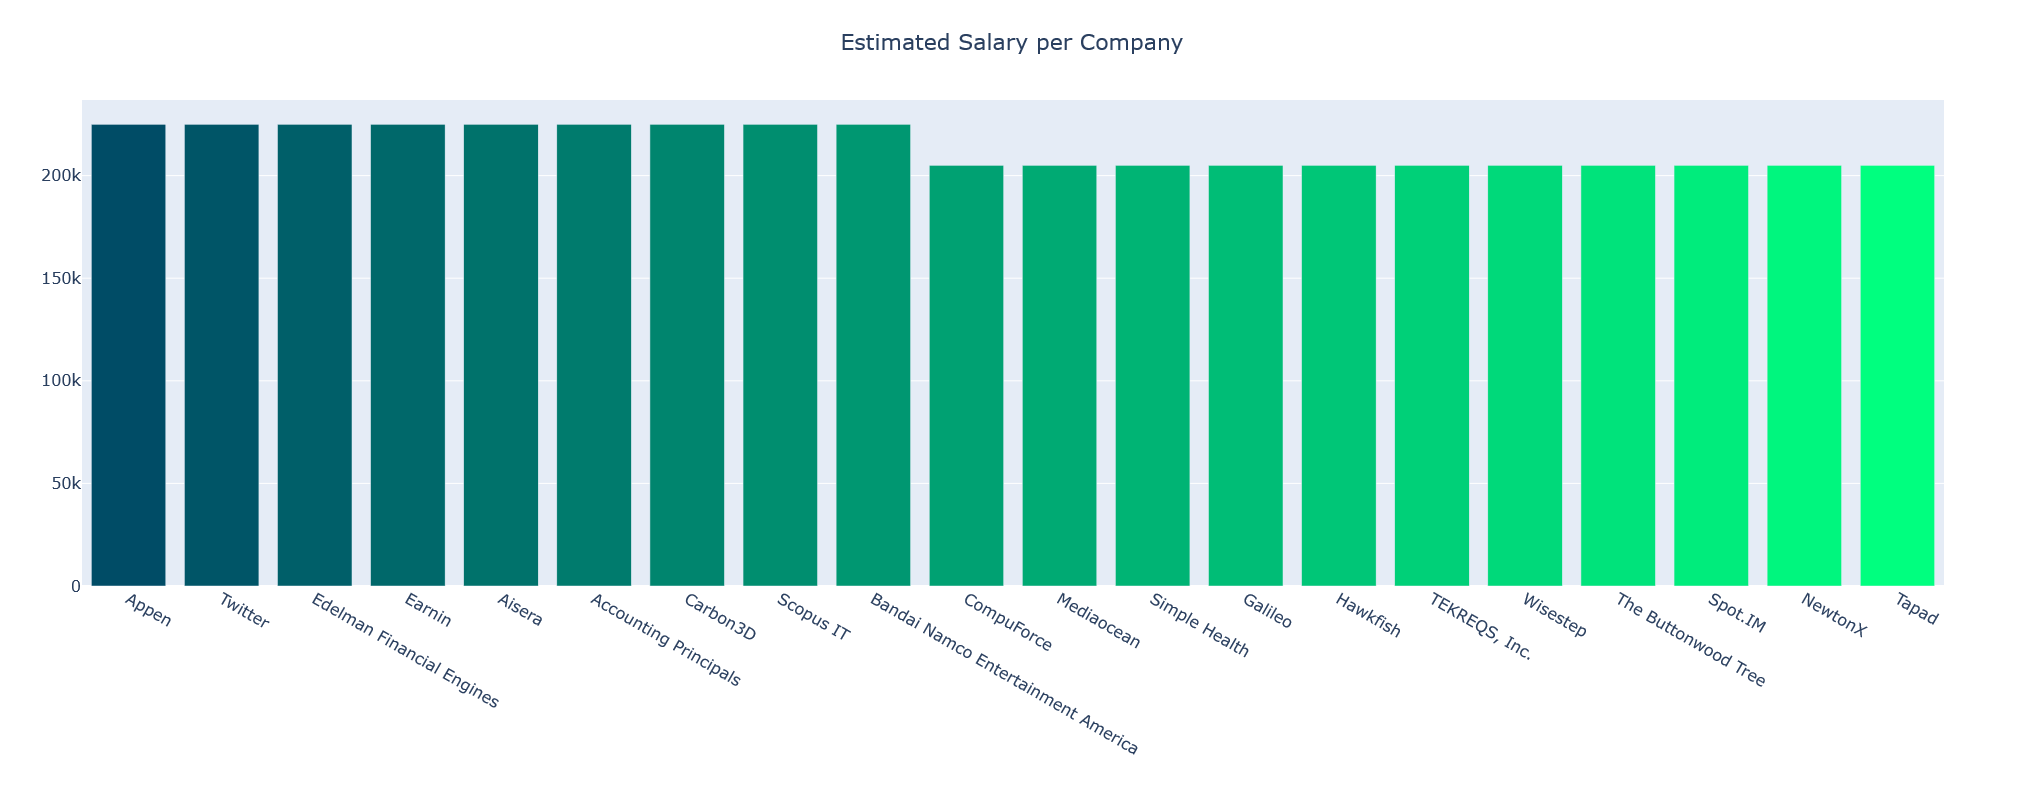

In [782]:
payment = df.groupby(by = ["Company Name"]).average_salary.mean().sort_values(ascending = False)

payment_df = to_df(payment, "Company","Payment")
plotlyplot(payment_df,20, "Estimated Salary per Company")

### Which industry pays most?

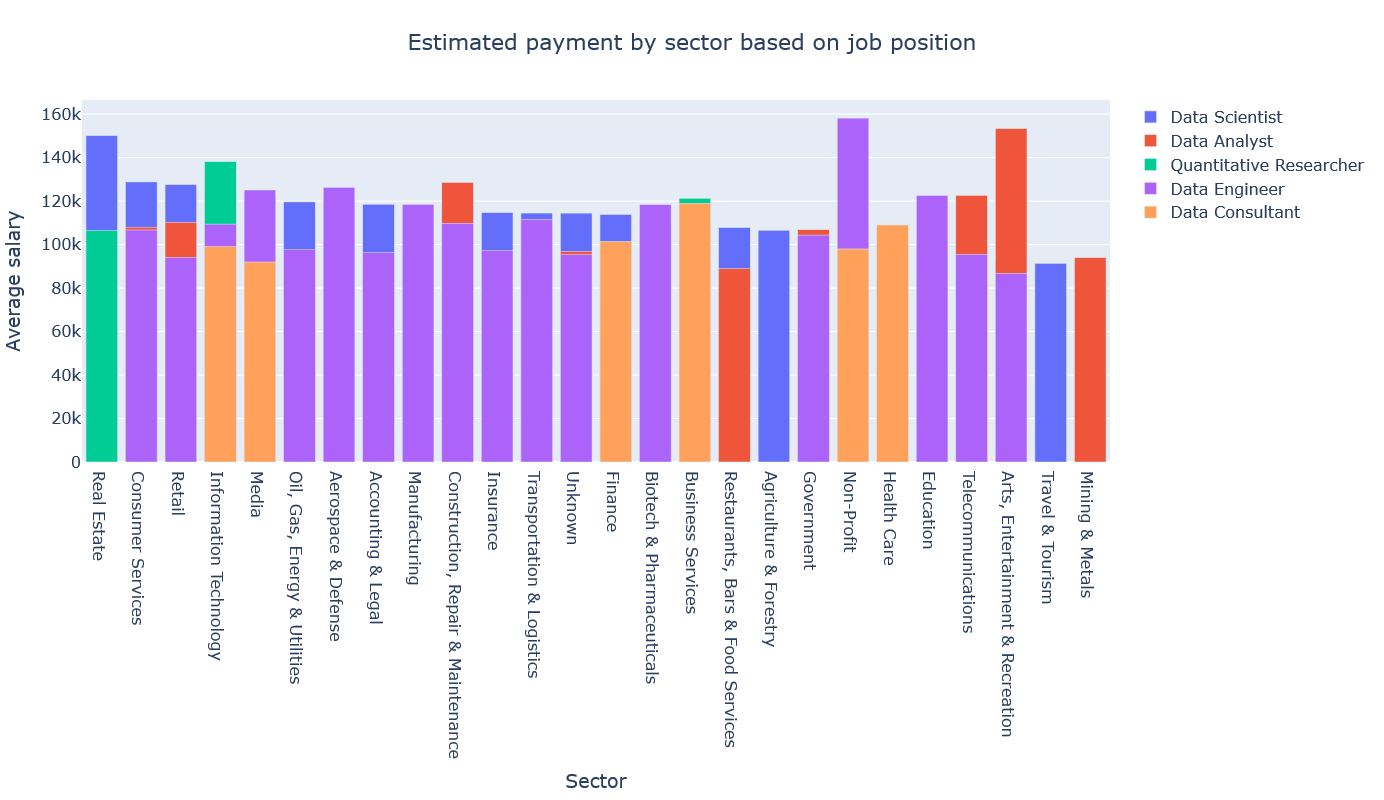

In [799]:
fig_paybysector = go.Figure(layout={
        'barmode': 'overlay'})

for index, job in enumerate(df["Compare Title"].unique()):
    industrypay = df[df["Compare Title"] == job].groupby(by = ["Sector", "Compare Title"]).average_salary.mean().sort_values(ascending = False).round(2).reset_index()
    #print(industrypay.columns)
    fig_paybysector.add_trace(go.Bar(x=industrypay["Sector"], y = industrypay["average_salary"], name=job))

fig_paybysector.update_layout(font_size = 16, height = 800, width = 1500, title = "Estimated payment by sector based on job position", 
                   title_x = 0.5, xaxis=dict(title='Sector'), yaxis=dict(title='Average salary'))
    
fig_paybysector.show()
fig_paybysector.show(renderer = "browser")

### In which state do you earn the most money as a Data Scientist?

In [785]:
money_state = df.groupby(by = ["State Location"]).average_salary.mean().sort_values(ascending = False).round(2).reset_index()
money_state

,State Location,average_salary
0,"New York, USA",135749.20
1,"California, USA",132636.54
2,"Delaware, USA",127277.78
3,"New Jersey, USA",120000.00
4,United Kingdom,99625.00
5,"Arizona, USA",97790.78
6,"Texas, USA",95373.93
7,"Pennsylvania, USA",94480.83
8,"Ohio, USA",94334.29
9,"Illinois, USA",85190.68


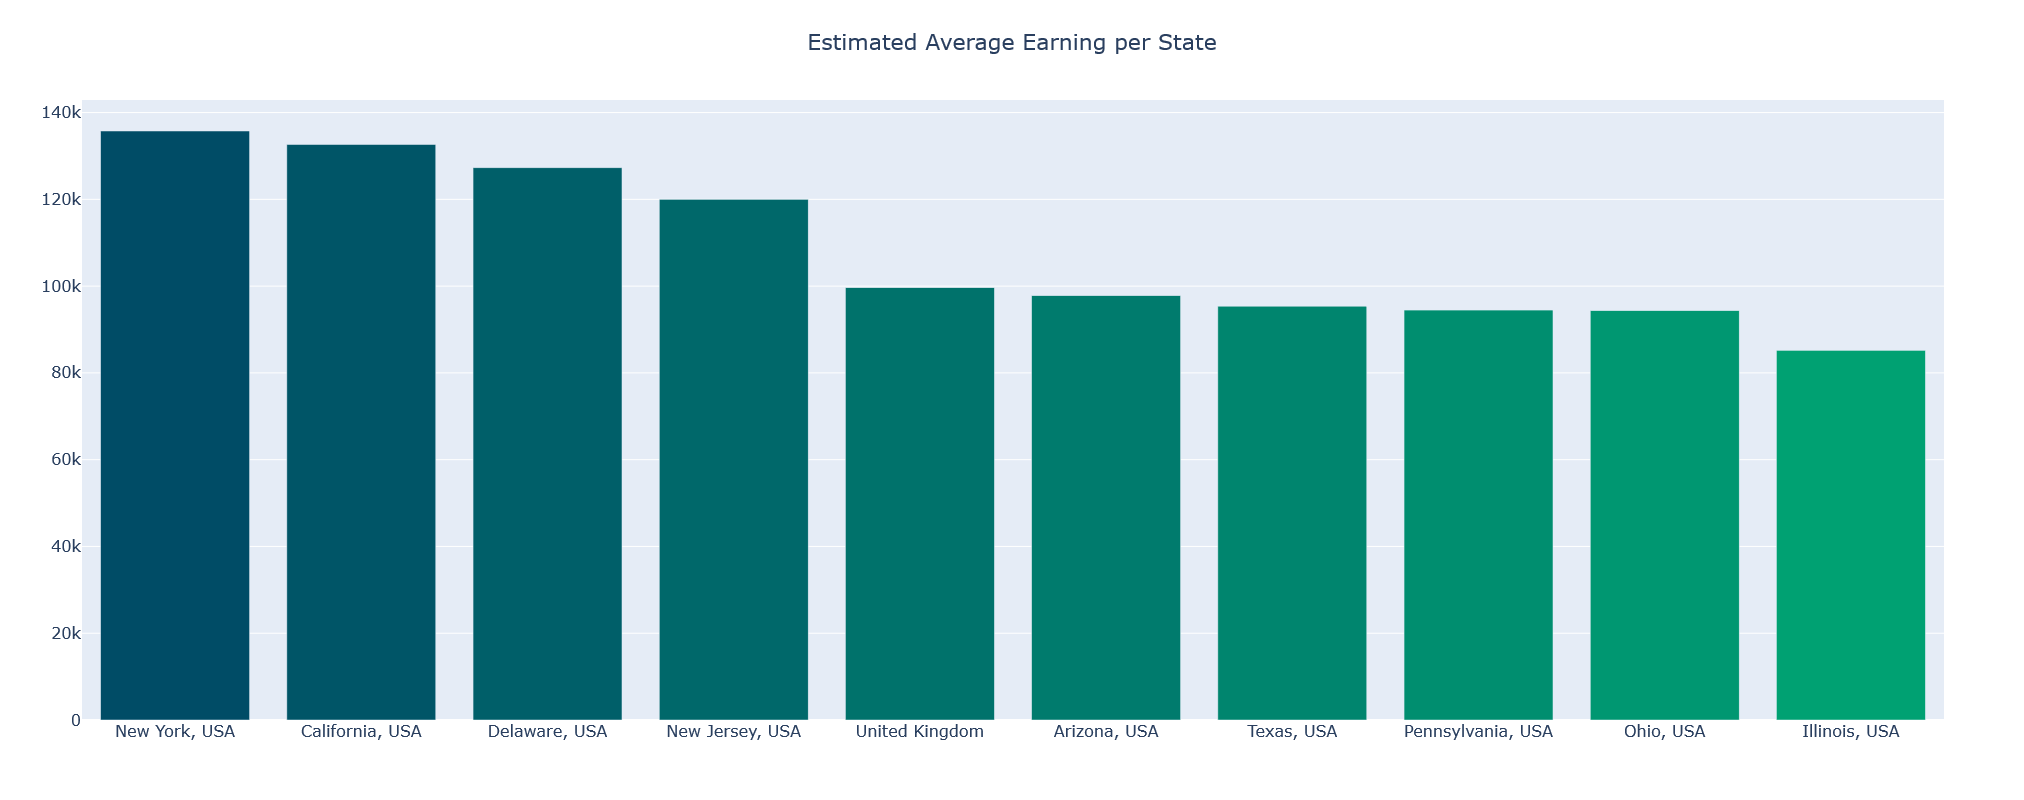

In [786]:
plotlyplot(money_state, 10, "Estimated Average Earning per State")

### In which state can you earn the most money related to Data Science?

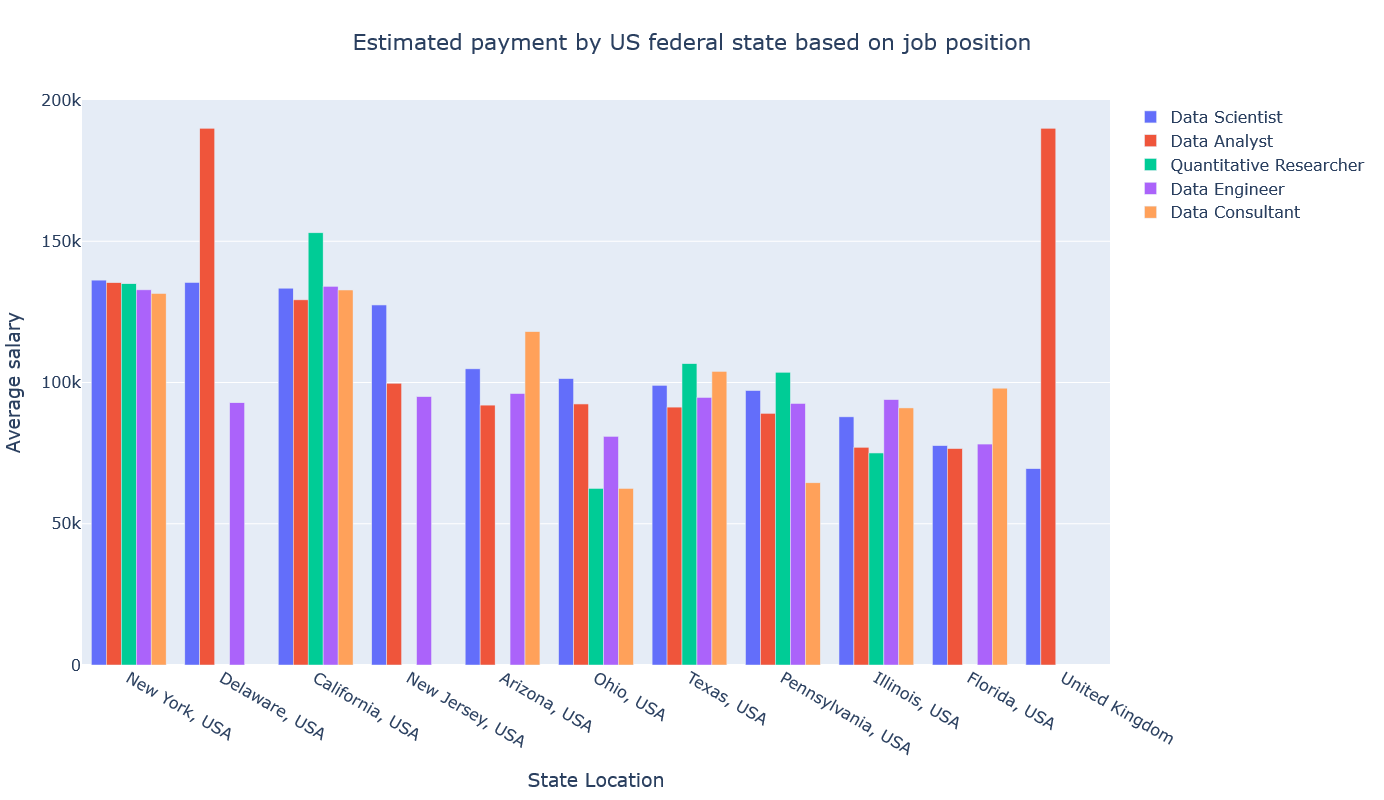

In [800]:
fig_paybystate = go.Figure(layout={
        'barmode': 'group'})

for job in df["Compare Title"].unique():
    industrypay = df[df["Compare Title"] == job].groupby(by = ["State Location", "Compare Title"]).average_salary.mean().sort_values(ascending = False).round(2).reset_index()
    #print(industrypay.columns)
    fig_paybystate.add_trace(go.Bar(x=industrypay["State Location"], y = industrypay["average_salary"], name=job))

fig_paybystate.update_layout(font_size = 16, height = 800, width = 1500, title = "Estimated payment by US federal state based on job position", 
                   title_x = 0.5, xaxis=dict(title='State Location'), yaxis=dict(title='Average salary'))
    
fig_paybystate.show()
fig_paybystate.show(renderer = "browser")

### In which state are the Data Science Companies located?

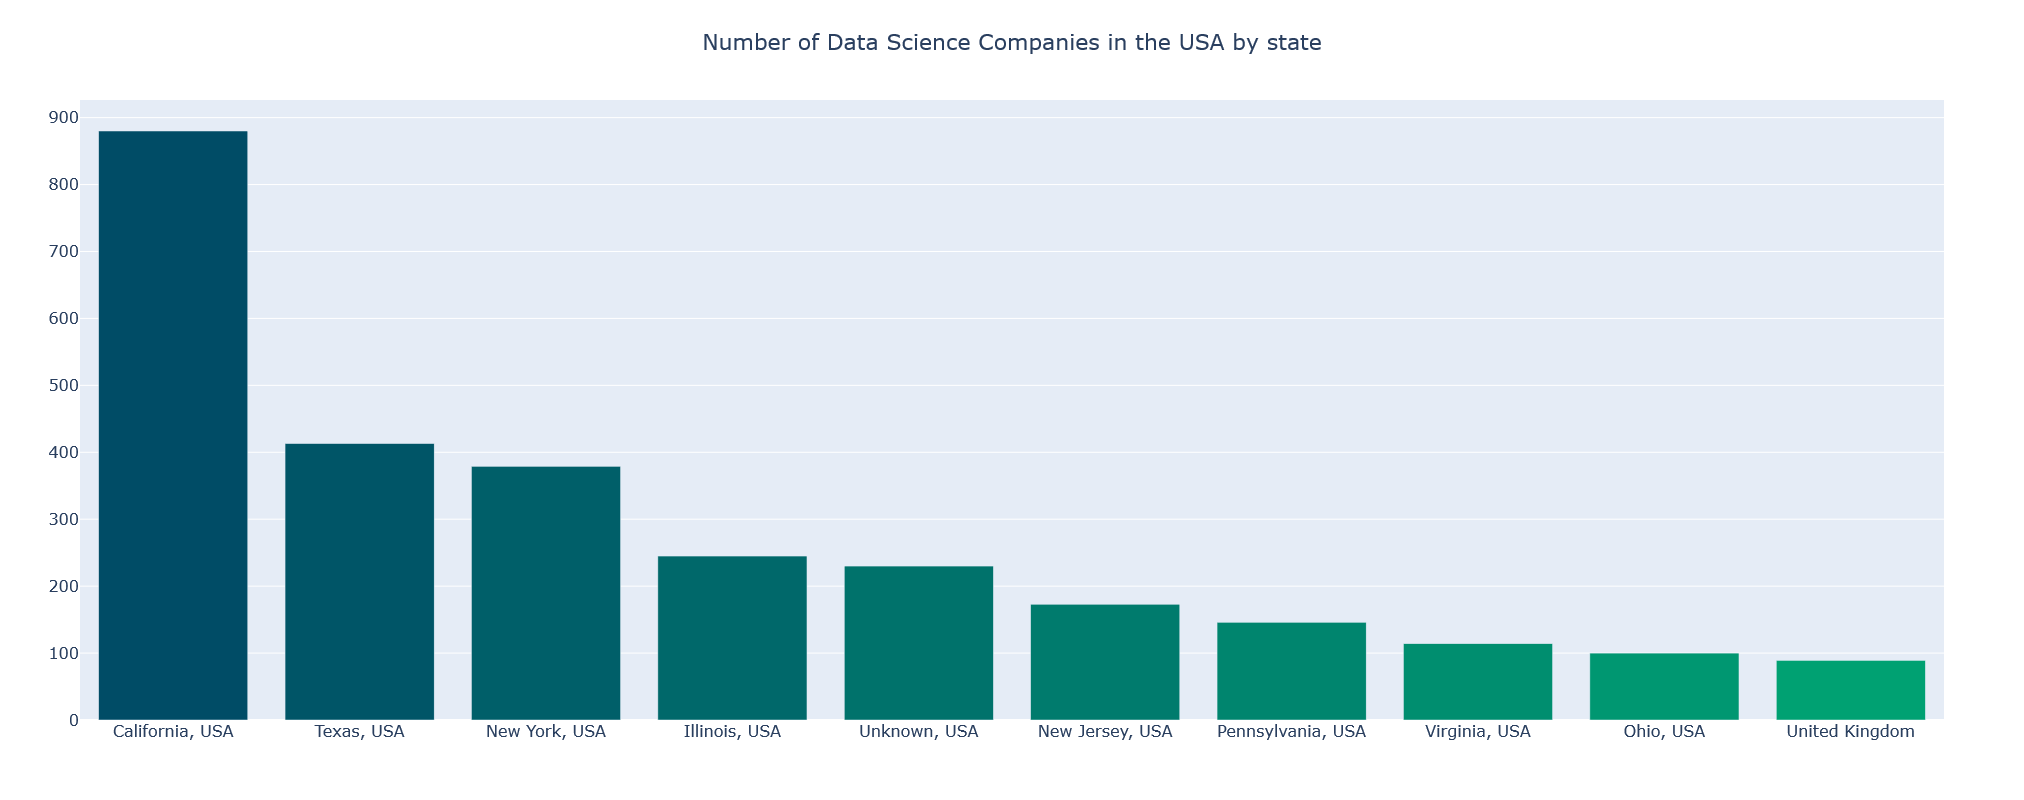

In [788]:
ds_locations = df["State Headquarter"].value_counts().reset_index()
plotlyplot(ds_locations, 10, "Number of Data Science Companies in the USA by state")

# do map plot here

### In which state are the most open positions for Data Scientists?

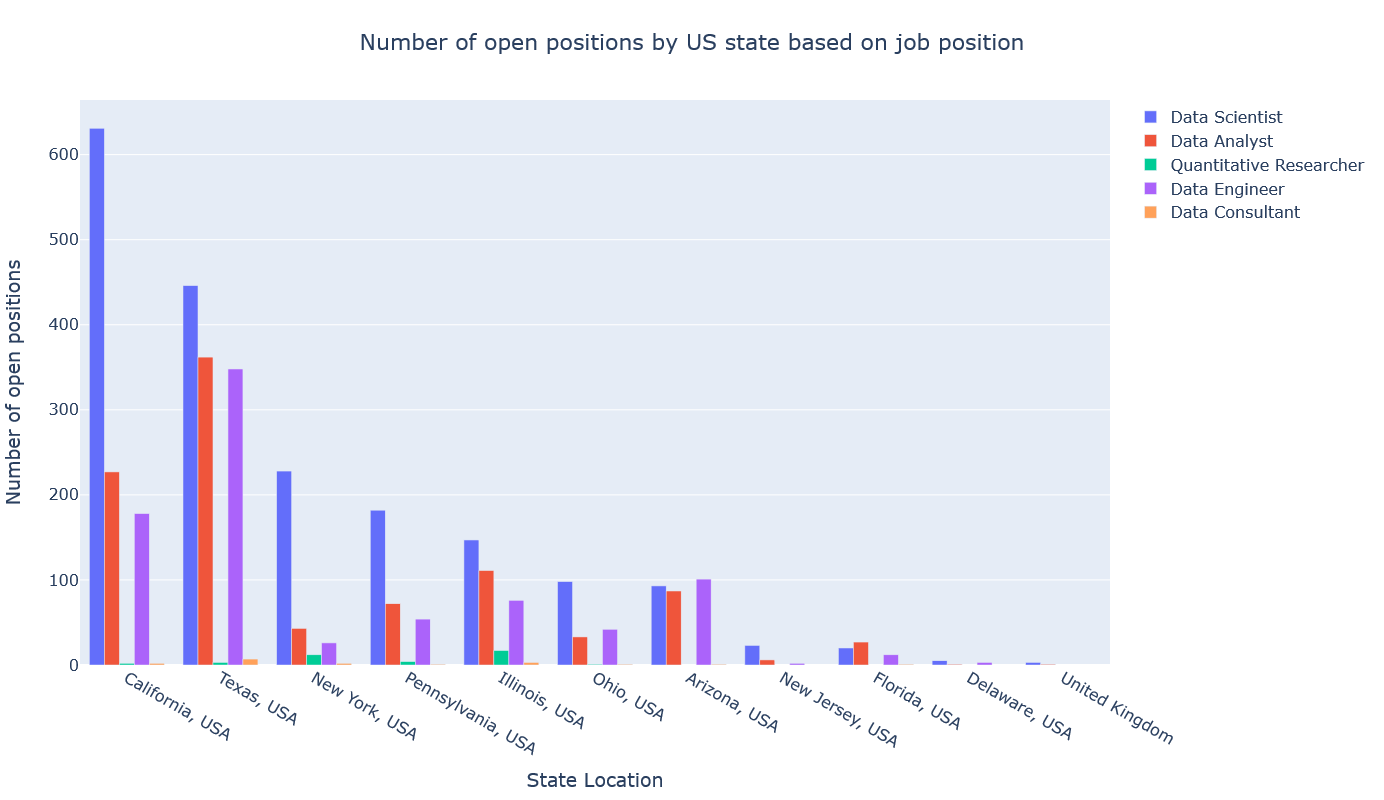

In [801]:
fig_jobsbystate = go.Figure(layout={
        'barmode': 'group'})

for job in df["Compare Title"].unique():
    industrypay = df[df["Compare Title"] == job].groupby(by = ["State Location", "Compare Title"])["Job Title"].count().sort_values(ascending = False).reset_index()
    #print(industrypay.columns)
    fig_jobsbystate.add_trace(go.Bar(x=industrypay["State Location"], y = industrypay["Job Title"], name=job))

fig_jobsbystate.update_layout(font_size = 16, height = 800, width = 1500, title = "Number of open positions by US state based on job position", 
                   title_x = 0.5, xaxis=dict(title='State Location'), yaxis=dict(title='Number of open positions'))
    
fig_jobsbystate.show()
fig_jobsbystate.show(renderer = "browser")

In [790]:
keywords_skills = {
    'airflow': 'Airflow', 'alteryx': 'Alteryx', 'aspnet': 'ASP.NET', 'atlassian': 'Atlassian', 
    'excel': 'Excel', 'powerbi': 'Power BI', 'tableau': 'Tableau', 'srss': 'SRSS', 'word': 'Word', 
    'unix': 'Unix', 'vue': 'Vue', 'jquery': 'jQuery', 'linuxunix': 'Linux / Unix', 'seaborn': 'Seaborn', 
    'microstrategy': 'MicroStrategy', 'spss': 'SPSS', 'visio': 'Visio', 'gdpr': 'GDPR', 'ssrs': 'SSRS', 
    'spreadsheet': 'Spreadsheet', 'aws': 'AWS', 'hadoop': 'Hadoop', 'ssis': 'SSIS', 'linux': 'Linux', 
    'sap': 'SAP', 'powerpoint': 'PowerPoint', 'sharepoint': 'SharePoint', 'redshift': 'Redshift', 
    'snowflake': 'Snowflake', 'qlik': 'Qlik', 'cognos': 'Cognos', 'pandas': 'Pandas', 'spark': 'Spark', 'outlook': 'Outlook'
}

keywords_programming = {
    'sql' : 'SQL', 'python' : 'Python', 'r' : 'R', 'c':'C', 'c#':'C#', 'javascript' : 'JavaScript', 'js':'JS', 'java':'Java', 
    'scala':'Scala', 'sas' : 'SAS', 'matlab': 'MATLAB', 'c++' : 'C++', 'perl' : 'Perl','go' : 'Go',
    'typescript' : 'TypeScript','bash':'Bash','html' : 'HTML','css' : 'CSS','php' : 'PHP','powershell' : 'Powershell',
    'rust' : 'Rust', 'kotlin' : 'Kotlin','ruby' : 'Ruby','dart' : 'Dart','assembly' :'Assembly',
    'swift' : 'Swift','vba' : 'VBA','lua' : 'Lua','groovy' : 'Groovy','delphi' : 'Delphi','objectivec' : 'Objective-C',
    'haskell' : 'Haskell','elixir' : 'Elixir','julia' : 'Julia','clojure': 'Clojure','solidity' : 'Solidity',
    'lisp' : 'Lisp','f#':'F#','fortran' : 'Fortran','erlang' : 'Erlang','apl' : 'APL','cobol' : 'COBOL',
    'ocaml': 'OCaml','crystal':'Crystal','javascripttypescript' : 'JavaScript / TypeScript','golang':'Golang',
    'nosql': 'NoSQL', 'mongodb' : 'MongoDB','tsql' :'Transact-SQL','vba' : 'Visual Basic',
    'pascal':'Pascal', 'mongo' : 'Mongo', 'plsql' : 'PL/SQL','sass' :'SASS', 'vbnet' : 'VB.NET','mssql' : 'MSSQL',
}

In [791]:
def find_keywords(job_title):
    word_count = {}

    for job_desc_text in df[df["Compare Title"] == job_title]["Job Description"]:

        job_desc_text = job_desc_text.translate(job_desc_text.maketrans("", "", "!$%&'()*,-./:;<=>?@[\]^`{|}~"))
        job_desc_text = job_desc_text.lower()
        job_desc_words = job_desc_text.split()
        job_desc_words = set(job_desc_words)
        
        for word in job_desc_words:
            if word in keywords_programming.keys():
                word_count[word] = word_count.get(word, 0) + 1

            if word in keywords_skills.keys():
                word_count[word] = word_count.get(word, 0) + 1
                
    word_count_sorted = dict(sorted(word_count.items(), key=lambda x: x[1]))
    reversed_dict = dict(reversed(word_count_sorted.items()))
    
    return  reversed_dict

kw_ds = find_keywords("Data Scientist")
#kw_ds

### Which skills are required for which position in Data Science?

In [798]:
job_list = {}
skills_df = pd.DataFrame()

fig1 = go.Figure(layout={
        'barmode': 'stack'})

for job in df["Compare Title"].unique():
    skills_dict = find_keywords(job)
       
    job_skills_dict = {"keywords" : skills_dict.keys(), "data" : skills_dict.values()}
    job_skills_df = pd.DataFrame(job_skills_dict).head(20)
    job_skills_df["Position"] = job
    job_skills_df = job_skills_df[["Position", "keywords", "data"]]

    fig1.add_trace(go.Bar(x=job_skills_df["keywords"], y=job_skills_df["data"], name=job))
    
    skills_df = pd.concat([skills_df, job_skills_df])

#plotlyscatterz(skills_df,"Title")

fig1.update_layout(font_size = 16, height = 800, width = 1500, title = "Required Skill by Job by number of naming in Job Postings", 
                   title_x = 0.5, xaxis=dict(title='Required Skill'), yaxis=dict(title='Number of namings in Job Postings'))
fig1.show(renderer = "browser")